In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image, ImageSequence

# Reading file tracked by ImageJ

In [2]:
#xmlデータを読み込みます
tree = ET.parse('LinearDecay.xml')
#一番上の階層の要素を取り出します
root = tree.getroot()

X,Y,Z=[],[],[]
totI=[]


for Spot in root.iter('Spot'):
    X.append(float(Spot.attrib["POSITION_X"]))
    Y.append(float(Spot.attrib["POSITION_Y"]))
    Z.append(float(Spot.attrib["POSITION_Z"]))
    totI.append(float(Spot.attrib["TOTAL_INTENSITY_CH1"]))

# Linear fit and plot

[  -367.21110642 271929.98582791] [[ 2.94938122e+01 -1.12104648e+04]
 [-1.12104648e+04  5.40544739e+06]]


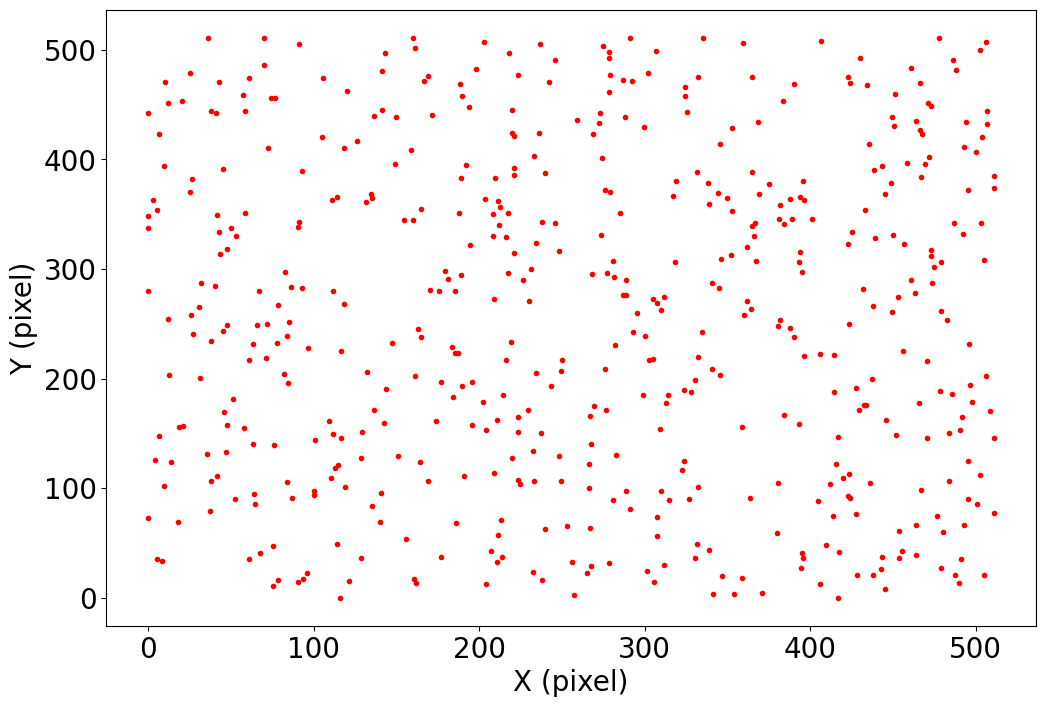

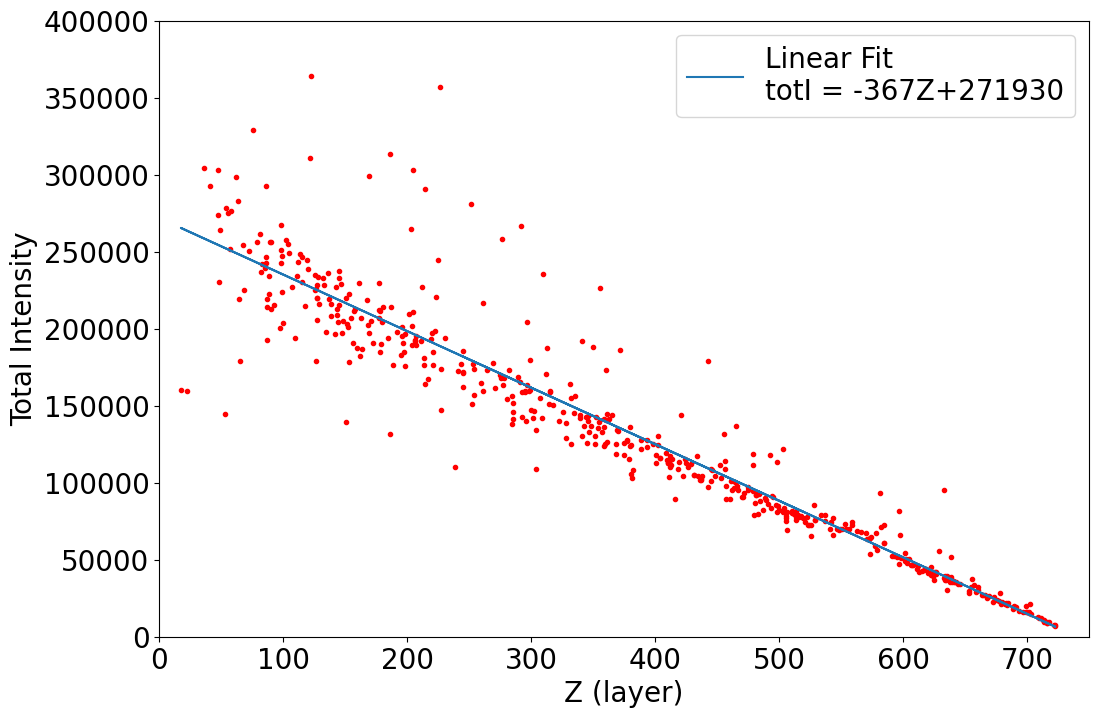

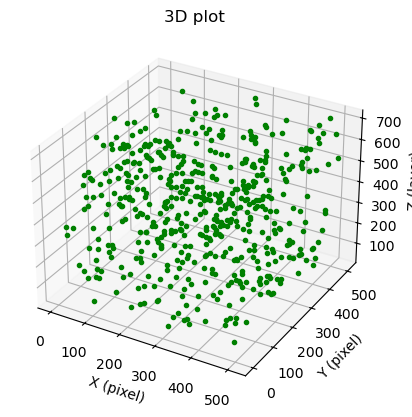

In [3]:
def line(x, a, b):
    return a*x + b
p0 = (0.1, -0.1)
popt,pocv = curve_fit(line, Z, totI , p0)
print(popt, pocv)



plt.figure(figsize=(12, 8))
# plt.grid(color = "gray", linestyle="--")
# plt.legend( ) # add legend
# plt.subplot(221)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('X (pixel)', fontsize = 20) # x axis label
plt.ylabel('Y (pixel)', fontsize = 20) # y axis label
plt.plot(X, Y, ".",color="red")
plt.savefig('fig/distributionP.jpg')
plt.show()


plt.figure(figsize=(12, 8))
# plt.grid(color = "gray", linestyle="--")
# plt.subplot(222)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0,750)
plt.ylim(0,400000)
plt.xlabel('Z (layer)', fontsize = 20) # x axis label
plt.ylabel('Total Intensity', fontsize = 20) # y axis label
plt.plot(Z, totI, ".",color="red")
plt.plot(Z, popt[0]*np.array(Z)+popt[1], "-", label=f"Linear Fit \ntotI = {round(popt[0])}Z+{round(popt[1])}")
plt.legend(fontsize = 20) # add legend
plt.savefig('fig/TotalIntensityP.jpg')
plt.show()

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.set_xlabel('X (pixel)', fontsize = 10) # x axis label
ax.set_ylabel('Y (pixel)', fontsize = 10) # y axis label
ax.set_zlabel('Z (layer)', fontsize = 10) # z axis label

# plotting
ax.plot3D(X, Y, Z, ".", color="green")
ax.set_title('3D plot')
plt.savefig('fig/3DplotP.jpg')
plt.show()